In [1]:
from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit,
                                     StratifiedKFold, GroupShuffleSplit,
                                     GroupKFold, StratifiedShuffleSplit)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Visualize the data

https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py

In [7]:
def visualize_groups(classes, groups, name):
    # Visualize dataset groups
    fig, ax = plt.subplots()
    ax.scatter(range(len(groups)),  [.5] * len(groups), c=groups, marker='_',
               lw=50, cmap=cmap_data)
    ax.scatter(range(len(groups)),  [3.5] * len(groups), c=classes, marker='_',
               lw=50, cmap=cmap_data)
    ax.set(ylim=[-1, 5], yticks=[.5, 3.5],
           yticklabels=['Data\ngroup', 'Data\nclass'], xlabel="Sample index")

In [2]:
np.random.seed(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 4

In [3]:
# Generate the class/group data
n_points = 100
X = np.random.randn(100, 10)

percentiles_classes = [.1, .3, .6]
y = np.hstack([[ii] * int(100 * perc)
               for ii, perc in enumerate(percentiles_classes)])

# Evenly spaced groups repeated once
groups = np.hstack([[ii] * 10 for ii in range(10)])

In [6]:
print(X) # random numbers
print(X.shape) #(100, 10)
print('------------')
print(y) # 0 1 2 
print(y.shape) # (100,)
print('------------')
print(groups) 0 1 2 3 4 5 6 7 8 9
print(groups.shape) (100,)

[[ 3.03395718e-01  6.90528873e-02 -1.36994721e+00 -1.73542443e+00
   9.20389861e-01 -6.73285587e-01  3.11302776e-01  1.65990867e+00
  -3.89927311e-01  2.46704222e-01]
 [ 1.26286911e+00 -7.14321172e-02  2.17658193e-01 -1.03871059e+00
  -5.77300027e-01  2.25155466e-01 -1.11415101e+00 -2.12117675e-01
  -1.16819684e-01 -2.32432838e-01]
 [ 1.01017204e+00 -1.52260114e+00 -3.89918857e-02 -4.95300601e-01
  -1.26511675e+00  1.30947599e+00 -4.80749816e-02  6.58444455e-01
   1.17818292e+00  9.24792733e-01]
 [-1.36163296e-01 -4.32713883e-01 -1.41218241e+00 -1.72601721e+00
  -1.27447583e-01  1.36070897e+00  1.80491419e+00 -8.31119097e-01
  -7.52473051e-01 -8.67474528e-01]
 [-1.09877395e+00 -1.58595929e-02  1.76340557e+00 -1.09515150e+00
   6.57601573e-01  8.53469564e-01 -1.34077646e+00  1.25792539e+00
   1.40744721e+00 -1.92822233e+00]
 [ 3.40339991e-01 -8.22247630e-01  9.87011426e-01 -4.05166630e-01
  -4.70118415e-01 -4.95036568e-01 -3.81351888e-01  1.40006141e-01
  -9.96311563e-01  4.71250057e-01

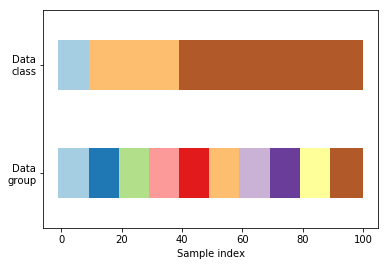

In [8]:
visualize_groups(y, groups, 'no groups')

# Visualize cross validation behavior

In [9]:
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # Plot the data classes and groups at the end
    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker='_', lw=lw, cmap=cmap_data)

    ax.scatter(range(len(X)), [ii + 2.5] * len(X),
               c=group, marker='_', lw=lw, cmap=cmap_data)

    # Formatting
    yticklabels = list(range(n_splits)) + ['class', 'group']
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+2.2, -.2], xlim=[0, 100])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

## visualizing Stratified shuffle split 
### We will use this mehtod for our EEG analysis

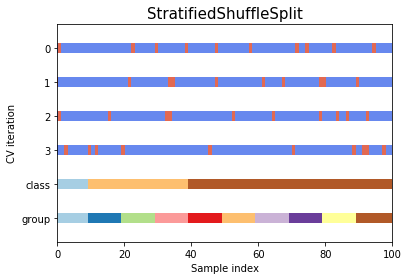

In [12]:
fig, ax = plt.subplots()
cv = StratifiedShuffleSplit(n_splits)
plot_cv_indices(cv, X, y, groups, ax, n_splits)

## visualizing some cross val methods

In [10]:
cvs = [KFold, GroupKFold, ShuffleSplit, StratifiedKFold,
       GroupShuffleSplit, StratifiedShuffleSplit, TimeSeriesSplit]


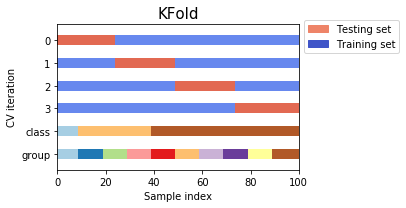

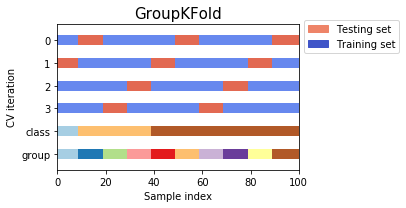

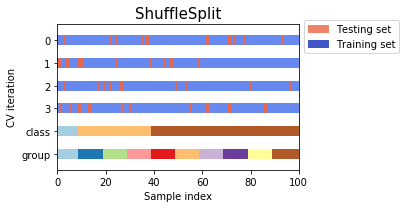

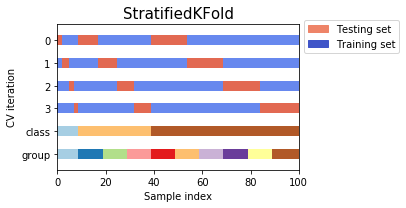

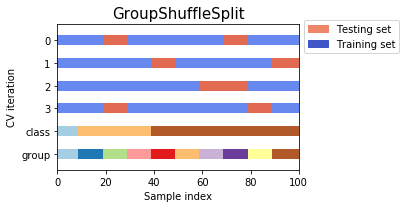

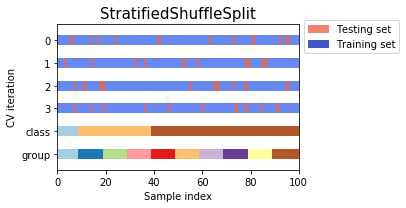

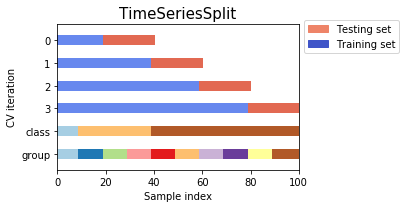

In [11]:
for cv in cvs:
    this_cv = cv(n_splits=n_splits)
    fig, ax = plt.subplots(figsize=(6, 3))
    plot_cv_indices(this_cv, X, y, groups, ax, n_splits)

    ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
              ['Testing set', 'Training set'], loc=(1.02, .8))
    # Make the legend fit
    plt.tight_layout()
    fig.subplots_adjust(right=.7)
plt.show()